In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv', encoding='utf-8')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

## Activation Functions

#### Rectified Linear Unit (ReLU):

$$\text{ReLU}(Z) = \max(0, Z) \$$

#### Softmax:
$$ \text{softmax}(Z_i) = \frac{e^{Z_i}}{\sum_{j=1}^{10} e^{Z_j}} $$

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward Propagation

The forward propagation step computes the activations at each layer:

$$ Z^{[1]} = W^{[1]} \cdot X + b^{[1]} $$

$$ A^{[1]} = \text{ReLU}(Z^{[1]}) $$

$$ Z^{[2]} = W^{[2]} \cdot A^{[1]} + b^{[2]} $$

$$ A^{[2]} = \text{softmax}(Z^{[2]}) $$

# Back Propagation
The backward propagation step computes the gradients with respect to the parameters:

$$ \frac{\partial \mathcal{L}}{\partial Z^{[2]}} = A^{[2]} - (Y) $$

$$ \frac{\partial W^{[2]}}{\partial \mathcal{L}} = \frac{1}{m} \frac{\partial Z^{[2]}}{\partial \mathcal{L}} \cdot (A^{[1]})^T $$

$$ \frac{\partial b^{[2]}}{\partial \mathcal{L}} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial Z^{[2]}}{\partial \mathcal{L}} $$

$$ \frac{\partial Z^{[1]}}{\partial \mathcal{L}} = (W^{[2]})^T \cdot \frac{\partial Z^{[2]}}{\partial \mathcal{L}} \cdot \text{ReLU}'(Z^{[1]}) $$

$$ \frac{\partial W^{[1]}}{\partial \mathcal{L}} = \frac{1}{m} \frac{\partial Z^{[1]}}{\partial \mathcal{L}} \cdot X^T $$

$$ \frac{\partial b^{[1]}}{\partial \mathcal{L}} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial Z^{[1]}}{\partial \mathcal{L}} $$

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
from tqdm import tqdm

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in tqdm(range(iterations)):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
eta = 0.1
epochs = 500

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, eta, epochs)

  0%|          | 2/500 [00:00<01:41,  4.88it/s]

Iteration:  0
[9 9 9 ... 9 9 9] [9 7 6 ... 5 0 6]
0.11036585365853659


  2%|▏         | 12/500 [00:02<01:17,  6.27it/s]

Iteration:  10
[2 2 3 ... 8 6 3] [9 7 6 ... 5 0 6]
0.18158536585365853


  4%|▍         | 22/500 [00:03<01:14,  6.39it/s]

Iteration:  20
[7 2 0 ... 8 6 9] [9 7 6 ... 5 0 6]
0.269609756097561


  6%|▋         | 32/500 [00:05<01:12,  6.41it/s]

Iteration:  30
[7 2 0 ... 8 6 9] [9 7 6 ... 5 0 6]
0.34612195121951217


  8%|▊         | 42/500 [00:06<01:10,  6.54it/s]

Iteration:  40
[7 7 0 ... 8 6 9] [9 7 6 ... 5 0 6]
0.4127073170731707


 10%|█         | 52/500 [00:08<01:10,  6.33it/s]

Iteration:  50
[7 7 6 ... 8 0 0] [9 7 6 ... 5 0 6]
0.4787560975609756


 12%|█▏        | 61/500 [00:10<01:58,  3.71it/s]

Iteration:  60
[7 7 6 ... 8 0 0] [9 7 6 ... 5 0 6]
0.5268048780487805


 14%|█▍        | 72/500 [00:12<01:10,  6.06it/s]

Iteration:  70
[7 7 6 ... 0 0 0] [9 7 6 ... 5 0 6]
0.5663658536585365


 16%|█▋        | 82/500 [00:14<01:04,  6.45it/s]

Iteration:  80
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.5954634146341463


 18%|█▊        | 92/500 [00:15<01:03,  6.44it/s]

Iteration:  90
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.6162195121951219


 20%|██        | 102/500 [00:17<01:01,  6.51it/s]

Iteration:  100
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.6374634146341464


 22%|██▏       | 112/500 [00:18<00:59,  6.53it/s]

Iteration:  110
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.6562682926829269


 24%|██▍       | 122/500 [00:20<01:02,  6.00it/s]

Iteration:  120
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.6719268292682927


 26%|██▋       | 132/500 [00:21<01:02,  5.89it/s]

Iteration:  130
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.685609756097561


 28%|██▊       | 142/500 [00:23<00:55,  6.49it/s]

Iteration:  140
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.6990975609756097


 30%|███       | 152/500 [00:25<00:52,  6.58it/s]

Iteration:  150
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7104634146341463


 32%|███▏      | 162/500 [00:26<00:50,  6.66it/s]

Iteration:  160
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.720609756097561


 34%|███▍      | 172/500 [00:28<00:48,  6.69it/s]

Iteration:  170
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7296585365853658


 36%|███▋      | 182/500 [00:29<00:49,  6.40it/s]

Iteration:  180
[7 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7382926829268293


 38%|███▊      | 192/500 [00:31<00:47,  6.46it/s]

Iteration:  190
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7460731707317073


 40%|████      | 202/500 [00:32<00:45,  6.60it/s]

Iteration:  200
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7532926829268293


 42%|████▏     | 212/500 [00:34<00:43,  6.59it/s]

Iteration:  210
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.76


 44%|████▍     | 222/500 [00:35<00:42,  6.51it/s]

Iteration:  220
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7657073170731707


 46%|████▋     | 232/500 [00:37<00:40,  6.63it/s]

Iteration:  230
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7713170731707317


 48%|████▊     | 242/500 [00:38<00:38,  6.77it/s]

Iteration:  240
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7767560975609756


 50%|█████     | 252/500 [00:40<00:39,  6.35it/s]

Iteration:  250
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7816829268292683


 52%|█████▏    | 261/500 [00:41<00:53,  4.49it/s]

Iteration:  260
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7868780487804878


 54%|█████▍    | 272/500 [00:44<00:40,  5.57it/s]

Iteration:  270
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7910975609756098


 56%|█████▋    | 282/500 [00:45<00:32,  6.80it/s]

Iteration:  280
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7958780487804878


 58%|█████▊    | 292/500 [00:47<00:31,  6.54it/s]

Iteration:  290
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.7999512195121952


 60%|██████    | 302/500 [00:48<00:29,  6.76it/s]

Iteration:  300
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.803439024390244


 62%|██████▏   | 312/500 [00:50<00:29,  6.43it/s]

Iteration:  310
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8069268292682927


 64%|██████▍   | 322/500 [00:51<00:26,  6.84it/s]

Iteration:  320
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8109024390243903


 66%|██████▋   | 332/500 [00:53<00:24,  6.88it/s]

Iteration:  330
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8133414634146341


 68%|██████▊   | 342/500 [00:54<00:22,  6.91it/s]

Iteration:  340
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8162195121951219


 70%|███████   | 352/500 [00:56<00:21,  6.75it/s]

Iteration:  350
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8192439024390243


 72%|███████▏  | 362/500 [00:57<00:20,  6.88it/s]

Iteration:  360
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8216829268292682


 74%|███████▍  | 372/500 [00:59<00:18,  6.88it/s]

Iteration:  370
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8239756097560975


 76%|███████▋  | 382/500 [01:00<00:18,  6.34it/s]

Iteration:  380
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8257073170731707


 78%|███████▊  | 392/500 [01:02<00:15,  6.84it/s]

Iteration:  390
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8284146341463414


 80%|████████  | 402/500 [01:03<00:14,  6.81it/s]

Iteration:  400
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8307073170731707


 82%|████████▏ | 412/500 [01:05<00:12,  6.86it/s]

Iteration:  410
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8327073170731707


 84%|████████▍ | 422/500 [01:06<00:11,  7.00it/s]

Iteration:  420
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8344146341463414


 86%|████████▋ | 432/500 [01:07<00:09,  6.98it/s]

Iteration:  430
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8364390243902439


 88%|████████▊ | 442/500 [01:09<00:08,  6.52it/s]

Iteration:  440
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.838390243902439


 90%|█████████ | 452/500 [01:11<00:07,  6.71it/s]

Iteration:  450
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8399268292682927


 92%|█████████▏| 462/500 [01:12<00:05,  6.93it/s]

Iteration:  460
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8418292682926829


 94%|█████████▍| 472/500 [01:13<00:04,  6.89it/s]

Iteration:  470
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8435121951219512


 96%|█████████▌| 481/500 [01:16<00:04,  4.19it/s]

Iteration:  480
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8448780487804878


 98%|█████████▊| 492/500 [01:17<00:01,  6.85it/s]

Iteration:  490
[9 7 6 ... 0 0 6] [9 7 6 ... 5 0 6]
0.8462682926829268


100%|██████████| 500/500 [01:19<00:00,  6.33it/s]


In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


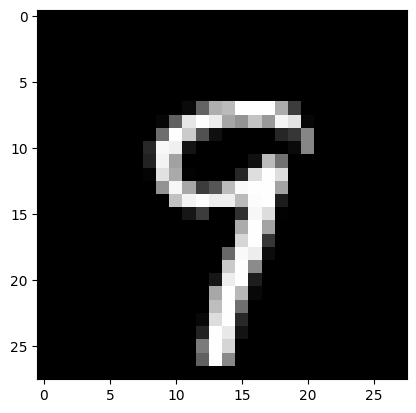

Prediction:  [7]
Label:  7


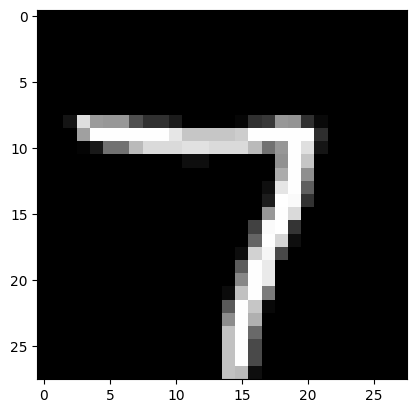

Prediction:  [6]
Label:  6


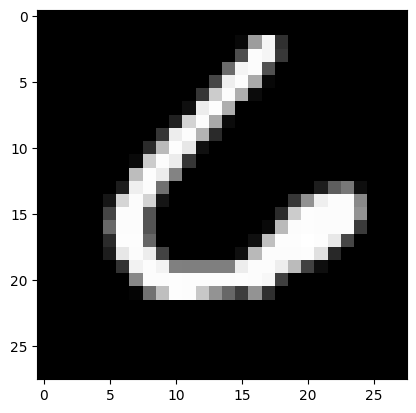

Prediction:  [5]
Label:  5


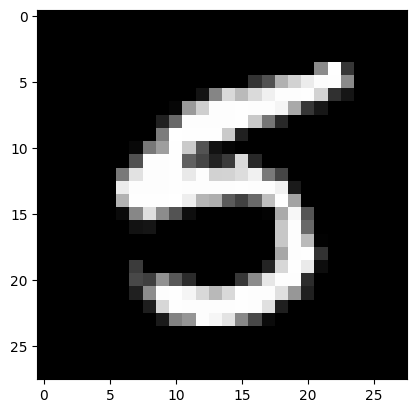

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [12]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [13]:
test_data = np.array(test_data)
m, n = test_data.shape

test_data = test_data[0:m].T
X_train = test_data
Y_train = test_data[0]
X_train = X_train / 255


# submission_df = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})

ImageId = []
predictions = []

prediction = make_predictions(X_train, W1, b1, W2, b2)
# prediction = make_predictions(X_train[:,m, None], W1, b1, W2, b2)
# current_image = X_train[:, 1, None]
# current_image = current_image.reshape((28, 28)) * 255
# plt.gray()
# plt.imshow(current_image, interpolation='nearest')
# plt.show()

# print(prediction)

In [14]:
prediction.shape

(28000,)

In [15]:
Y_train.shape

(28000,)

In [16]:
my_submission = pd.DataFrame({'ImageId': range(0, len(prediction)), 'Label': prediction})

In [17]:
my_submission.head()

,ImageId,Label
0,0,2
1,1,0
2,2,9
3,3,9
4,4,2


In [19]:
my_submission.to_csv('submission.csv', index=False)